# scix: moderation regression analysis

install packages

In [10]:
# install.packages('mediation') #Mediation package
# install.packages('rockchalk') #Graphing simple slopes; moderation
# install.packages('multilevel') #Sobel Test
# install.packages('bda') #Another Sobel Test option
# install.packages('gvlma') #Testing Model Assumptions 
# install.packages('stargazer') #Handy regression tables
# install.packages('readr')
# install.packages('interactions')

also installing the dependencies 'pander', 'jtools'





The downloaded binary packages are in
	/var/folders/sf/ns35g2p52qn763j7_gtvn4z00000gn/T//RtmpzuGhYJ/downloaded_packages


load libraries

In [19]:
library(mediation) #Mediation package
library(rockchalk) #Graphing simple slopes; moderation
library(multilevel) #Sobel Test
library(bda) #Another Sobel Test option
library(gvlma) #Testing Model Assumptions 
library(stargazer) #Handy regression tables
library(readr)
library(interactions)
library(ggplot2)

read in data

In [3]:
data <- read_tsv('moderation.tsv')

Rows: 25 Columns: 6
-- Column specification --------------------------------------------------------
Delimiter: "\t"
dbl (6): education, AUDIT, education_centered, RewP_centered, education x Re...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
summary(data)

   education         AUDIT       education_centered RewP_centered    
 Min.   :10.00   Min.   : 3.00   Min.   :-4.92      Min.   :-6.1811  
 1st Qu.:13.00   1st Qu.: 7.00   1st Qu.:-1.92      1st Qu.:-1.8952  
 Median :16.00   Median : 9.00   Median : 1.08      Median :-0.6060  
 Mean   :14.92   Mean   :10.36   Mean   : 0.00      Mean   :-0.5081  
 3rd Qu.:16.00   3rd Qu.:11.00   3rd Qu.: 1.08      3rd Qu.: 0.9039  
 Max.   :18.00   Max.   :27.00   Max.   : 3.08      Max.   : 3.5356  
 education x RewP   AP_rewp_difference
 Min.   :-19.0377   Min.   :-6.1811   
 1st Qu.: -2.9538   1st Qu.:-1.8952   
 Median : -0.6728   Median :-0.6060   
 Mean   : -1.4879   Mean   :-0.5081   
 3rd Qu.:  1.3983   3rd Qu.: 0.9039   
 Max.   :  4.8306   Max.   : 3.5356   

center data

In [5]:
#Centering Data
AUDIT <- data$AUDIT
rewpc <- c(scale(data$AP_rewp_difference, center=TRUE, scale=FALSE)) #Centering IV; AUDIT
EA_years <- c(scale(data$education,  center=TRUE, scale=FALSE)) #Centering moderator; age

#Moderation "By Hand"
fitMod <- lm(AUDIT ~ rewpc + EA_years + rewpc*EA_years) #Model interacts IV & moderator
summary(fitMod)


Call:
lm(formula = AUDIT ~ rewpc + EA_years + rewpc * EA_years)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7984 -3.4410 -0.9019  0.9274 14.5562 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.6700     1.1646   8.303 4.51e-08 ***
rewpc            0.9052     0.5987   1.512   0.1455    
EA_years         1.0300     0.5446   1.891   0.0725 .  
rewpc:EA_years  -0.4638     0.2551  -1.818   0.0834 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.505 on 21 degrees of freedom
Multiple R-squared:  0.2385,	Adjusted R-squared:  0.1297 
F-statistic: 2.192 on 3 and 21 DF,  p-value: 0.1191


In [6]:
coef(summary(fitMod))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),9.6699761,1.1646254,8.303078,4.513930e-08
rewpc,0.9051761,0.5986956,1.511914,1.454593e-01
EA_years,1.0300252,0.5446278,1.891246,7.246661e-02
rewpc:EA_years,-0.4637629,0.2550895,-1.818040,8.335296e-02


In [7]:
gvlma(fitMod)


Call:
lm(formula = AUDIT ~ rewpc + EA_years + rewpc * EA_years)

Coefficients:
   (Intercept)           rewpc        EA_years  rewpc:EA_years  
        9.6700          0.9052          1.0300         -0.4638  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = fitMod) 

                     Value  p-value                   Decision
Global Stat        12.6871 0.012910 Assumptions NOT satisfied!
Skewness            7.9712 0.004753 Assumptions NOT satisfied!
Kurtosis            1.9242 0.165392    Assumptions acceptable.
Link Function       0.4207 0.516599    Assumptions acceptable.
Heteroscedasticity  2.3709 0.123613    Assumptions acceptable.

In [8]:
#Data Summary
stargazer(fitMod,type="text", title = "Reward respnsiveness and educational attainment on AUD severity")


Reward respnsiveness and educational attainment on AUD severity
                        Dependent variable:    
                    ---------------------------
                               AUDIT           
-----------------------------------------------
rewpc                          0.905           
                              (0.599)          
                                               
EA_years                      1.030*           
                              (0.545)          
                                               
rewpc:EA_years                -0.464*          
                              (0.255)          
                                               
Constant                     9.670***          
                              (1.165)          
                                               
-----------------------------------------------
Observations                    25             
R2                             0.238           
Adjusted R2            

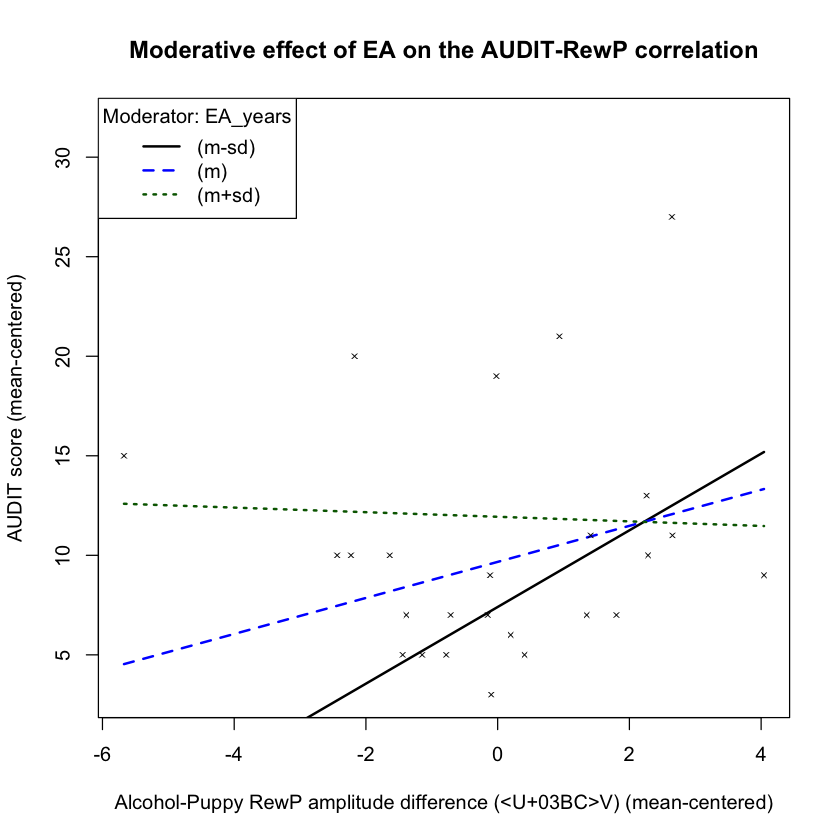

In [9]:
#Plotting
ps  <- plotSlopes(fitMod, plotx="rewpc", modx="EA_years", main = "Moderative effect of EA on the AUDIT-RewP correlation", ylab = "AUDIT score", xlab = "Alcohol-Puppy RewP amplitude difference (μV) (mean-centered)", modxVals = "std.dev", pch=4)

The color.class argument is deprecated. Please use 'colors' instead.


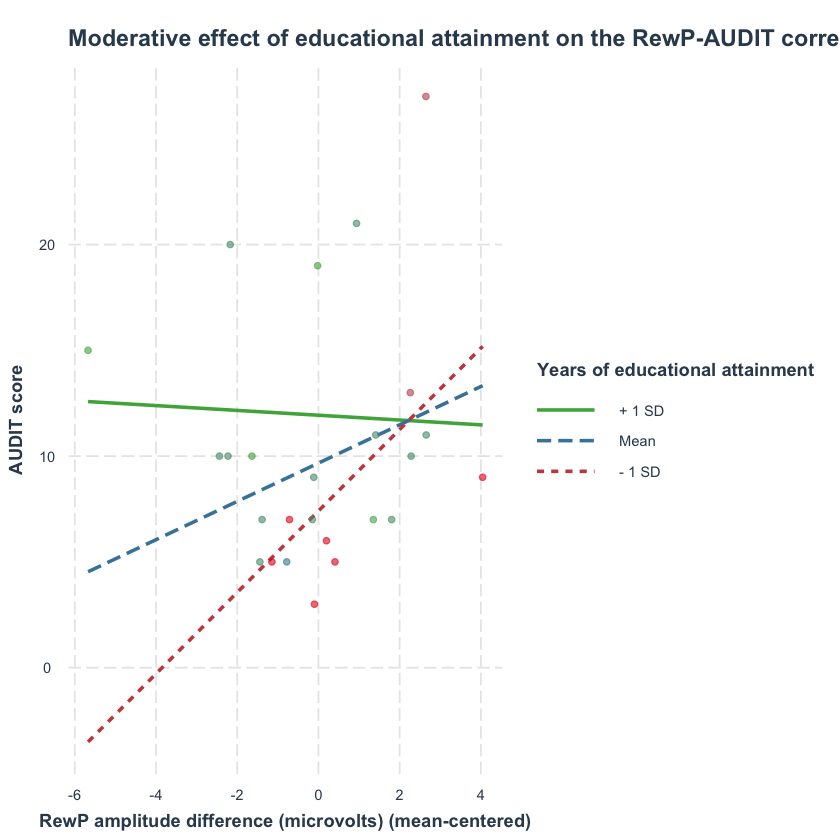

In [21]:
interact_plot(fitMod, "rewpc", "EA_years", plot.points=TRUE,
            x.label="RewP amplitude difference (microvolts) (mean-centered)",
            y.label="AUDIT score",
            legend.main="Years of educational attainment",
            main.title="Moderative effect of educational attainment on the RewP-AUDIT correlation",
            color.class="Set1")

`geom_smooth()` using formula = 'y ~ x'


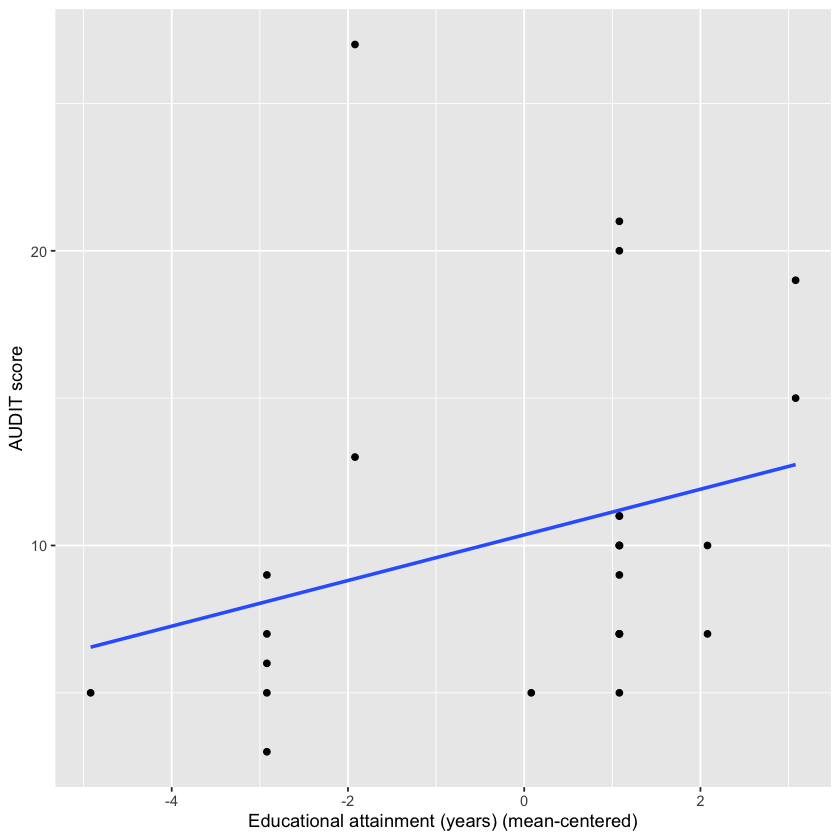

In [28]:
ggplot(data, aes(x=education_centered, y=AUDIT)) +
    geom_point() +
    xlab("Educational attainment (years) (mean-centered)") +
    ylab("AUDIT score") +
    geom_smooth(method='lm', se=FALSE)
